# Formalism to compute PBHs' abundances
### Code writed by Tadeo D.
#### References: https://arxiv.org/pdf/2001.06469

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## PEAK THEORY (with compaction function)

### Def. Compaction function

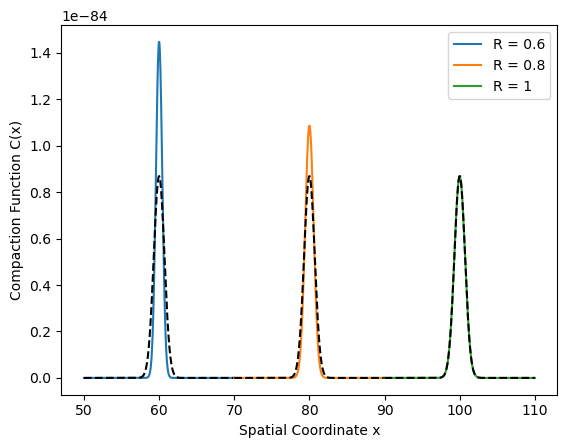

In [9]:
H_t = 2.2e-42

# Forma completa de la función de compactación en 1D
def compaction_function(x, R):
    prefactor = H_t**2 / (np.pi**(3/2) * R)
    gaussian_term = np.exp(-x**2 / R**2)
    return prefactor * gaussian_term

x_values = np.linspace(-10, 10, 500)

R_values = [0.6, 0.8, 1]


# Graficar C(x) para cada valor de R
for R in R_values:
    C_values_full = compaction_function(x_values, R)
    plt.plot(x_values + 100*R, C_values_full, label=f'R = {R}')
    plt.plot(x_values + 100*R, compaction_function(x_values, 1.), color='black', linestyle='--')
    #plt.plot(x_values + 100*R, C_values_full, label=f'R = {R}')

#collapse_threshold = 0.25  # Umbral arbitrario para propósitos ilustrativos
#plt.axhline(y=collapse_threshold, color='blue', linestyle='--', label='Collapse Threshold')


# Configuración de la gráfica
plt.xlabel('Spatial Coordinate x')
plt.ylabel('Compaction Function C(x)')

plt.legend()
plt.show()


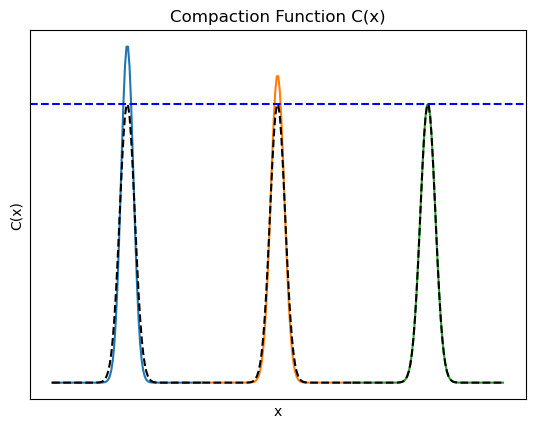

In [4]:
H_t = 1#2.2e-42  # en GeV

def delta_contrast(t, y):
    return np.exp(-y**2)

def compaction_function(x, R):
    integrand = lambda y: np.exp(-((x - y)**2) / R**2) * delta_contrast(0, y)
    prefactor = H_t**2 / (np.pi**(3/2) * R)
    result, _ = quad(integrand, -np.inf, np.inf, limit=100)
    return prefactor * result

x_values = np.linspace(-10, 10, 100)
R_values = [0.6, 0.8, 1]
for R in R_values:
    C_values = [compaction_function(x, R) for x in x_values]
    plt.plot(x_values + 100*R, C_values, label=f'C(x, R={R})')

    C_values_shifted = [compaction_function(x, 1.0) for x in x_values]
    plt.plot(x_values + 100*R, C_values_shifted, color='black', linestyle='--')
collapse_threshold = 0.225  # Umbral arbitrario para propósitos ilustrativos
plt.axhline(y=collapse_threshold, color='blue', linestyle='--', label='Collapse Threshold')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.title('Compaction Function C(x)')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
#plt.legend()
plt.show()

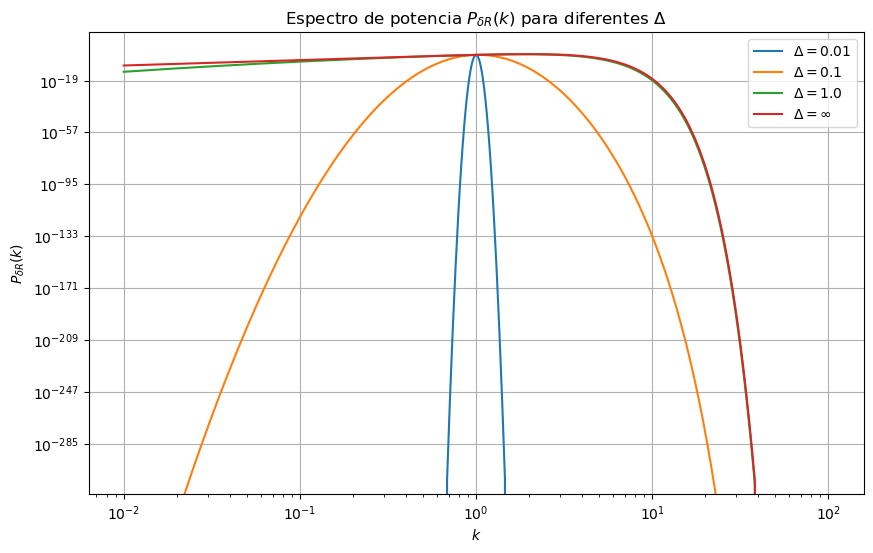

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Espectro de potencia parametrizado (B5)
def power_spectrum(k, A, R, k_star, delta):

    term1 = A * (k * R)**4
    smoothing_term = np.exp(-((k * R)**2) / 2)
    if delta == np.inf:
        lognormal_term = 1.0  # Sin lognormal para delta infinito
    else:
        lognormal_term = np.exp(-((np.log(k / k_star))**2) / (2 * delta**2))
    return term1 * smoothing_term * lognormal_term

# Parámetros
A = 1.0
R = 1.0  # Relacionado con k_star como R = 1/k_star
k_star = 1.0
delta_values = [0.01, 0.1, 1.0, np.inf]  # Anchos de pico lognormal
k_values = np.logspace(-2, 2, 500)

# Graficar P_delta_R para diferentes valores de delta
plt.figure(figsize=(10, 6))
for delta in delta_values:
    P_values = [power_spectrum(k, A, R, k_star, delta) for k in k_values]
    label = r"$\Delta = {}$".format("∞" if delta == np.inf else delta)
    plt.plot(k_values, P_values, label=label)

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r'$P_{\delta R}(k)$')
plt.title('Espectro de potencia $P_{\delta R}(k)$ para diferentes $\Delta$')
plt.legend()
plt.grid(True)
plt.show()


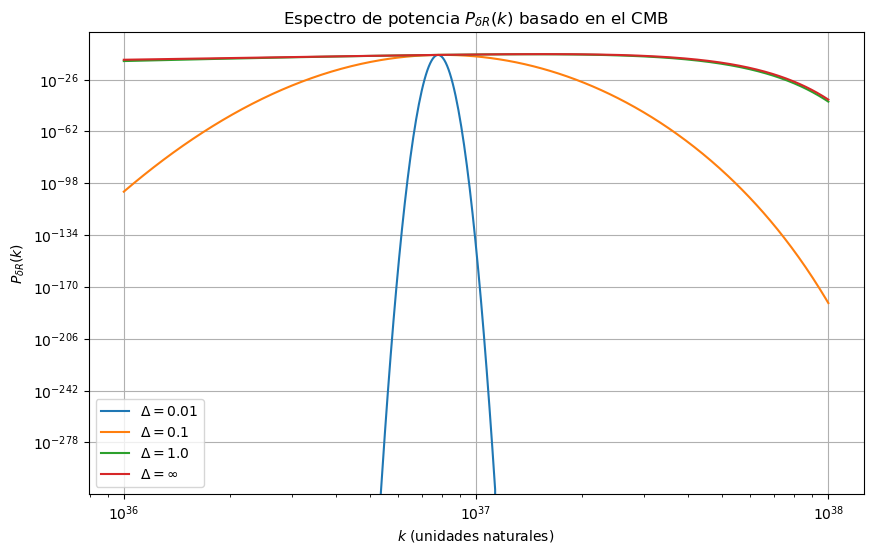

In [10]:
def power_spectrum_cmb(k, A, R, k_star, delta):
    term1 = A * (k * R)**4
    smoothing_term = np.exp(-((k * R)**2) / 2)
    if delta == np.inf:
        lognormal_term = 1.0  # Sin lognormal para delta infinito
    else:
        lognormal_term = np.exp(-((np.log(k / k_star))**2) / (2 * delta**2))
    return term1 * smoothing_term * lognormal_term

# Parámetros basados en el CMB
A_s = 2.1e-9  # Amplitud del espectro de potencia (CMB)
k_star = 7.8e36  # Escala de pivote en unidades naturales (CMB)
R = 1 / k_star  # Relación de escala
delta_values = [0.01, 0.1, 1.0, np.inf]  # Diferentes anchos
k_values = np.logspace(36, 38, 500)  # Rango de k basado en unidades naturales

# Graficar P_delta_R para diferentes valores de delta
plt.figure(figsize=(10, 6))
for delta in delta_values:
    P_values = [power_spectrum_cmb(k, A_s, R, k_star, delta) for k in k_values]
    label = r"$\Delta = {}$".format("∞" if delta == np.inf else delta)
    plt.plot(k_values, P_values, label=label)

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ (unidades naturales)')
plt.ylabel(r'$P_{\delta R}(k)$')
plt.title('Espectro de potencia $P_{\delta R}(k)$ basado en el CMB')
plt.legend()
plt.grid(True)
plt.show()



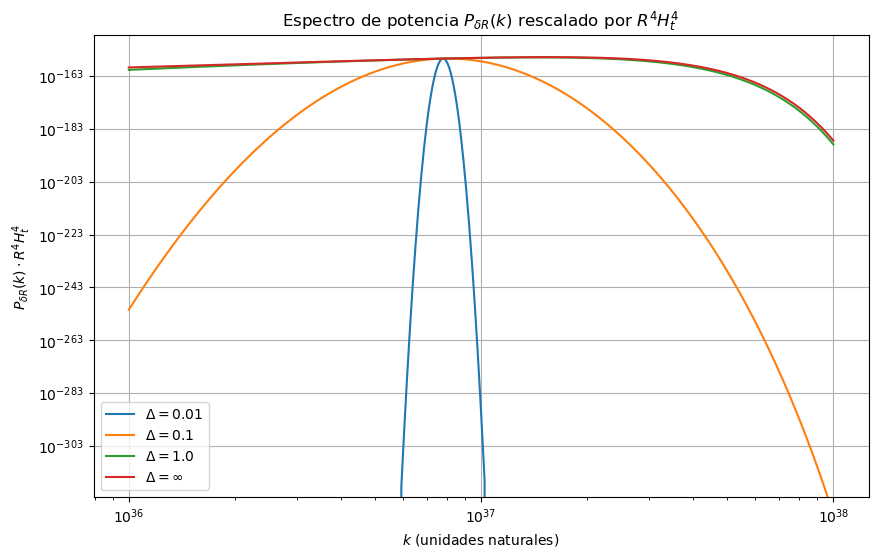

In [428]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del espectro de potencia rescalado
H_t =  1  # en unidades naturales
A = 2.1e-9  # Amplitud del espectro (CMB)
k_star = 7.8e36  # Escala de pivote en unidades naturales
R = 1 / k_star  # Relación de escala
delta_values = [0.01, 0.1, 1.0, np.inf]  # Diferentes anchos
k_values = np.logspace(36, 38, 500)  # Rango de k en unidades naturales

# Espectro de potencia rescalado
def power_spectrum_rescaled(k, A, R, k_star, delta):
    term1 = A * (k * R)**4
    smoothing_term = np.exp(-((k * R)**2) / 2)
    if delta == np.inf:
        lognormal_term = 1.0  # Sin lognormal para delta infinito
    else:
        lognormal_term = np.exp(-((np.log(k / k_star))**2) / (2 * delta**2))
    P_delta_R = term1 * smoothing_term * lognormal_term
    return P_delta_R * R**4 * H_t**4

# Graficar el espectro de potencia rescalado
plt.figure(figsize=(10, 6))
for delta in delta_values:
    P_rescaled_values = [power_spectrum_rescaled(k, A, R, k_star, delta) for k in k_values]
    label = r"$\Delta = {}$".format("∞" if delta == np.inf else delta)
    plt.plot(k_values, P_rescaled_values, label=label)

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ (unidades naturales)')
plt.ylabel(r'$P_{\delta R}(k) \cdot R^4 H_t^4$')
plt.title('Espectro de potencia $P_{\delta R}(k)$ rescalado por $R^4 H_t^4$')
plt.legend()
plt.grid(True)
plt.show()


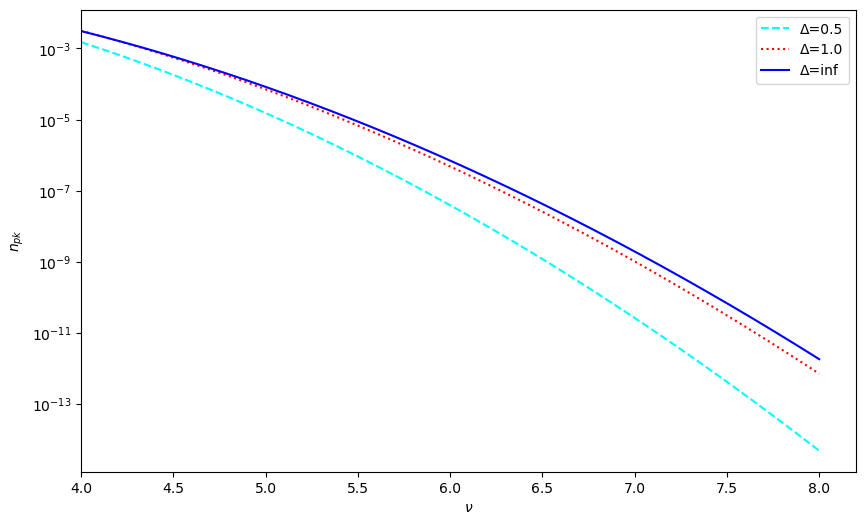

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

colors = ['cyan', 'red', 'blue']
styles = ["dashed", "dotted", "solid"]

def sigma_n(n, A, R, k_star, delta, k_min=1e-10, k_max=1e3, H_t=1):
    def power_spectrum(k):
        term1 = A * (k * R)**4
        smoothing_term = np.exp(-((k * R)**2) / 2)
        if delta == np.infty: 
            lognormal_term = 1.0
        else:
            lognormal_term = np.exp(-((np.log(k / k_star))**2) / (2 * delta**2))
        return term1 * smoothing_term * lognormal_term * R**4 * H_t**4
        
    integrand = lambda k: (k**(2 * n) / k) * power_spectrum(k)
    result, _ = quad(integrand, k_min, k_max, limit=10000)
        
    return np.sqrt(result)


def gamma_02(sigma_0, sigma_1, sigma_2):
    return -(sigma_1**2 / (sigma_0 * sigma_2))

def gamma_0RR(sigma_0, sigma_1, sigma_2, sigma_RR, R):
    return (2 * R**(-2) * sigma_0**2 - (5/2) * sigma_1**2 + (1/4) * R**2 * sigma_2**2) / (sigma_0 * sigma_RR)

def gamma_2RR(sigma_1, sigma_2, sigma_3, sigma_RR, R):
    return ((2 * (R**(-2) * (sigma_1**2))) + ((5/2) * (sigma_2**2)) + ((1/4) * (R**2) * (sigma_3**2))) / (sigma_2 * sigma_RR)


def alpha(gamma_02, gamma_0RR, gamma_2RR, sigma_0, R, sigma_2):
    term1 = gamma_0RR
    term2 = (gamma_2RR - (gamma_0RR * gamma_02)) / (1 - gamma_02**2)
    term3 = ((4 * sigma_0) / (R**2 * sigma_2)) - gamma_02
    return term1 + term2 * term3

nu_values = np.linspace(4,8,5000)


A = 1
k_star = 1
R = 1/k_star
delta_values = [0.05e1, 0.1e1, np.infty]  # Diferentes valores de Δ
plt.figure(figsize=(10, 6))

for delta, color, style in zip(delta_values, colors, styles):
    if delta == 0.05e1:
        k_star = 0.46e1
        
    #if delta == 0.1e1:
    #    k_star = 0.12e2
        
    sigma_0 = sigma_n(0, A, R, k_star, delta)
    sigma_1 = sigma_n(1, A, R, k_star, delta)
    sigma_2 = sigma_n(2, A, R, k_star, delta)
    sigma_3 = sigma_n(3, A, R, k_star, delta)
    sigma_4 = sigma_n(4, A, R, k_star, delta)
    sigma_RR_value = np.sqrt((4 * R**(-4) * sigma_0**2) + (10 * R**(-2) * sigma_1**2) + ((35/2) * sigma_2**2) + ((5/4) * R**2 * sigma_3**2) + ((1/16) * R**4 * sigma_4**2))
    gamma02 = np.sqrt(2/3)
    gamma0RR = np.sqrt(2)/3
    gamma2RR = 1/(3*np.sqrt(3))
    alpha_value = alpha(gamma02, gamma0RR, gamma2RR, sigma_0, R, sigma_2)
                             
    def n_hi_pk(nu):
        prefactor = (16 * np.sqrt(2)) / (3**(3/2) * np.pi**(5/2))
        term = (sigma_RR_value * sigma_0**3) / (sigma_2 * (sigma_1**3) * (R**7) * np.sqrt(1 - gamma02**2))
        exp_term = np.exp(-(0.5 * nu**2) * ((1 + (16 * (sigma_0**2) / (R**4 * sigma_2**2)) - (8 * sigma_0 * gamma02 / (R**2 * sigma_2))) / (1 - gamma02**2)))
        return prefactor * term * alpha_value * nu**4 * exp_term
        
    n_hi_pk_values = np.array([n_hi_pk(nu) for nu in nu_values])
    
    if delta == np.infty:
        def sigma_n_log(n, A, R, k_star, delta, k_min, k_max, H_t=1):#2.2e-42):
            def power_spectrum(k):
                if delta == np.infty:
                    term1 = A * ((k * R)**4)
                    smoothing_term = np.exp(-((k * R)**2) / 2)
                    lognormal_term = 1
                else:
                    term1 = A * ((k * R)**4)
                    smoothing_term = np.exp(-((k * R)**2) / 2)
                    lognormal_term = np.exp(-((np.log(k*R))**2) / (2 * delta**2))
                return term1 * smoothing_term * lognormal_term * R**4 * H_t**4
            integrand = lambda k: (k**(2 * n) / k) * power_spectrum(k)
            result, _ = quad(integrand, k_min, k_max, limit=10000)
            return np.sqrt(result)
        k_star = 0.07e1
        k_minima = 0
        k_maxima = np.infty
        R = 1./k_star
        sigma_0 = sigma_n_log(0, A, R, k_star, delta, k_minima, k_maxima)
        sigma_1 = sigma_n_log(1, A, R, k_star, delta, k_minima, k_maxima)
        sigma_2 = sigma_n_log(2, A, R, k_star, delta, k_minima, k_maxima)
        sigma_3 = sigma_n_log(3, A, R, k_star, delta, k_minima, k_maxima)
        sigma_4 = sigma_n_log(4, A, R, k_star, delta, k_minima, k_maxima)
        sigma_RR_value = np.sqrt((4 * R**(-4) * sigma_0**2) + (10 * R**(-2) * sigma_1**2) + ((35/2) * sigma_2**2) + ((5/4) * R**2 * sigma_3**2) + ((1/16) * R**4 * sigma_4**2))
        gamma02 = np.sqrt(2/3)
        gamma0RR = np.sqrt(2)/3
        gamma2RR = 1/(3*np.sqrt(3))
        alpha_value = alpha(gamma02, gamma0RR, gamma2RR, sigma_0, R, sigma_2)
        
        def n_hi_pk(nu):
            prefactor = (16 * np.sqrt(2)) / (3**(3/2) * np.pi**(5/2))
            term = (sigma_RR_value * sigma_0**3) / (sigma_2 * (sigma_1**3) * (R**7) * np.sqrt(1 - gamma02**2))
            exp_term = np.exp(-(0.5 * nu**2) * ((1 + (16 * (sigma_0**2) / (R**4 * sigma_2**2)) - (8 * sigma_0 * gamma02 / (R**2 * sigma_2))) / (1 - gamma02**2)))
            return prefactor * term * alpha_value * nu**4 * exp_term
        
    n_hi_pk_values = np.array([n_hi_pk(nu) for nu in nu_values])
    
    
        
    
    if delta == 0.1e1:
        def sigma_n_log(n, A, R, k_star, delta, k_min, k_max, H_t=1):#2.2e-42):
            def power_spectrum(k):
                if delta == np.infty:
                    term1 = A * ((k * R)**4)
                    smoothing_term = np.exp(-((k * R)**2) / 2)
                    lognormal_term = 1
                else:
                    term1 = A * ((k * R)**4)
                    smoothing_term = np.exp(-((k * R)**2) / 2)
                    lognormal_term = np.exp(-((np.log(k*R))**2) / (2 * delta**2))
                return term1 * smoothing_term * lognormal_term * R**4 * H_t**4
            integrand = lambda k: (k**(2 * n) / k) * power_spectrum(k)
            result, _ = quad(integrand, k_min, k_max, limit=10000)
            return np.sqrt(result)        
        k_star = 0.079e1
        k_minima = 1e-10
        k_maxima = 1e3
        R = 1/k_star
        sigma_0 = sigma_n_log(0, A, R, k_star, delta, k_minima, k_maxima)
        sigma_1 = sigma_n_log(1, A, R, k_star, delta, k_minima, k_maxima)
        sigma_2 = sigma_n_log(2, A, R, k_star, delta, k_minima, k_maxima)
        sigma_3 = sigma_n_log(3, A, R, k_star, delta, k_minima, k_maxima)
        sigma_4 = sigma_n_log(4, A, R, k_star, delta, k_minima, k_maxima)
        sigma_RR_value = np.sqrt((4 * R**(-4) * sigma_0**2) + (10 * R**(-2) * sigma_1**2) + ((35/2) * sigma_2**2) + ((5/4) * R**2 * sigma_3**2) + ((1/16) * R**4 * sigma_4**2))
        gamma02 = -gamma_02(sigma_0, sigma_1, sigma_2)
        gamma0RR = -gamma_0RR(sigma_0, sigma_1, sigma_2, sigma_RR_value, R)
        gamma2RR = gamma_2RR(sigma_1, sigma_2, sigma_3, sigma_RR_value, R)
        alpha_value = alpha(gamma02, gamma0RR, gamma2RR, sigma_0, R, sigma_2)
        
        def n_hi_pk(nu):
            prefactor = (16 * np.sqrt(2)) / (3**(3/2) * np.pi**(5/2))
            term = (sigma_RR_value * sigma_0**3) / (sigma_2 * (sigma_1**3) * (R**7) * np.sqrt(1 - gamma02**2))
            exp_term = np.exp(-(0.5 * nu**2) * ((1 + (16 * (sigma_0**2) / (R**4 * sigma_2**2)) - (8 * sigma_0 * gamma02 / (R**2 * sigma_2))) / (1 - gamma02**2)))
            return prefactor * term * alpha_value * nu**4 * exp_term
        
    n_hi_pk_values = np.array([n_hi_pk(nu) for nu in nu_values])    
    
    plt.plot(nu_values, n_hi_pk_values, label=f'Δ={delta}', color=color,  linestyle=style)


plt.xlabel(r'$\nu$')
plt.ylabel(r'$n_{pk}$')
plt.yscale('log')
plt.xlim([4,8.2])
#plt.ylim([1e-14,0.1e-2])
plt.legend()
plt.show()